**_<div style="text-align: center"> - - -   Ahmed Gurbuz | SMU Data Science Bootcamp   - - -</div>_**

# WeatherPy
----

#### This Python script visualizes the weather of randomly selected 500+ cities across the world of varying distance from the equator and builds a series of scatter plots to showcase the following relationships:

* Temperature (F) vs. Latitude
* Humidity (%) vs. Latitude
* Cloudiness (%) vs. Latitude
* Wind Speed (mph) vs. Latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as ow
from pprint import pprint

# Import API key
from config import openweatherkey

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generating Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

635

### Performing API Calls
* Performing a weather check on each city using a series of successive API calls.
* Including a print log of each city as it'sbeing processed (with the city number and city name).



In [3]:
# Create a settings dictionary with your API key and preferred unit
params = {"units": "imperial", "appid": openweatherkey}

# Define base url derived from Open Weather API docs
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Create a for loop to see if query url built upon the base url works or not 
# Check first 10 cities API response objects
counter = 0
for city in cities:
    params['q'] = city
    if counter == 5:
        break
    response = requests.get(base_url, params = params)
    print(response)
    counter = counter + 1

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [4]:
#Create Data Frame for the features we will be analyzing for each city
data_df = pd.DataFrame(columns=['City','Cloudiness','Country','Date','Humidity','Lat','Lng', 'Max Temp', 'Wind Speed'])

In [5]:
#Create counters for the loop
record_count = 1

#Create loop
#Gathering information from Openweather API for each city
for i, city in enumerate(cities): 
    params["q"] = city
    
    # Create conditional
    # Create a set for every 60 cities
    if (i % 60 == 0 and i > 50):
        record_count = 1

    # Giving a break while fetching data not to exceed API (Open Weather API restricts 60 calls per minute for free accounts)
        time.sleep(50)
    
    # Create try/except condition to catch and see that city information can be found or not from API call
    try:
        print(f"Processing Record {record_count} | {city}")
        
        # Create get request to achieve response object and convert it into JSON
        response = requests.get(base_url, params = params).json()
        
        # Filling Data Frame with information fetched from API (API docs)
        data_df.loc[i, "City"] = city
        data_df.loc[i, "Cloudiness"] = response['clouds']['all']
        data_df.loc[i, "Country"] = response['sys']['country']      
        data_df.loc[i, "Date"] = response['dt']       
        data_df.loc[i, "Humidity"] = response['main']['humidity']  
        data_df.loc[i, "Lat"] = response['coord']['lat']
        data_df.loc[i, "Lng"] = response['coord']['lon']
        data_df.loc[i, "Max Temp"] = response['main']['temp_max']
        data_df.loc[i, "Wind Speed"] = response['wind']['speed']              
    
    # Print 'City not found' if the API request gets no response
    except:
        print(f"City not found. Skipping...") 
    record_count += 1

# Print out when data retrieval completed                 
print("Data retrieval finished")

Processing Record 1 | ulladulla
Processing Record 2 | thompson
Processing Record 3 | luderitz
Processing Record 4 | ceres
Processing Record 5 | beringovskiy
Processing Record 6 | cape town
Processing Record 7 | tuktoyaktuk
Processing Record 8 | hermanus
Processing Record 9 | malwan
City not found. Skipping...
Processing Record 10 | la ronge
Processing Record 11 | bredasdorp
Processing Record 12 | punta arenas
Processing Record 13 | qaanaaq
Processing Record 14 | new norfolk
Processing Record 15 | okha
Processing Record 16 | chunoyar
Processing Record 17 | hithadhoo
Processing Record 18 | ushuaia
Processing Record 19 | tecolutla
Processing Record 20 | vilyuysk
Processing Record 21 | nouakchott
Processing Record 22 | zhaotong
Processing Record 23 | dunedin
Processing Record 24 | jamestown
Processing Record 25 | mataura
Processing Record 26 | illoqqortoormiut
City not found. Skipping...
Processing Record 27 | hobart
Processing Record 28 | roald
Processing Record 29 | saskylakh
Processing 

Processing Record 58 | bidor
Processing Record 59 | havre-saint-pierre
Processing Record 60 | alekseyevsk
Processing Record 1 | lac-megantic
Processing Record 2 | villamontes
Processing Record 3 | lata
Processing Record 4 | atar
Processing Record 5 | bourail
Processing Record 6 | prince rupert
Processing Record 7 | eyl
Processing Record 8 | rafaela
Processing Record 9 | berlevag
Processing Record 10 | muscat
Processing Record 11 | egvekinot
Processing Record 12 | tsihombe
City not found. Skipping...
Processing Record 13 | kovdor
Processing Record 14 | conde
Processing Record 15 | hofn
Processing Record 16 | gasa
Processing Record 17 | aklavik
Processing Record 18 | araxa
Processing Record 19 | zhangjiakou
Processing Record 20 | salym
Processing Record 21 | sencha
Processing Record 22 | novaya bryan
Processing Record 23 | te anau
Processing Record 24 | guymon
Processing Record 25 | nikolskoye
Processing Record 26 | vostok
Processing Record 27 | oktyabrskiy
Processing Record 28 | inhamba

Processing Record 53 | piacabucu
Processing Record 54 | dawlatabad
Processing Record 55 | najran
Processing Record 56 | bacau
Processing Record 57 | marawi
Processing Record 58 | urucara
Processing Record 59 | chake chake
Processing Record 60 | khor
Processing Record 1 | oranjemund
Processing Record 2 | beaverlodge
Processing Record 3 | vardo
Processing Record 4 | okhotsk
Processing Record 5 | paita
Processing Record 6 | buchanan
Processing Record 7 | tazovskiy
Processing Record 8 | north bend
Processing Record 9 | xinzhou
Processing Record 10 | palo alto
Processing Record 11 | louisbourg
City not found. Skipping...
Processing Record 12 | kushva
Processing Record 13 | visby
Processing Record 14 | thinadhoo
Processing Record 15 | tarudant
City not found. Skipping...
Processing Record 16 | villazon
City not found. Skipping...
Processing Record 17 | salalah
Processing Record 18 | klaksvik
Processing Record 19 | karkaralinsk
City not found. Skipping...
Processing Record 20 | lazaro cardena

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# Export the city data into a csv file
data_csv = data_df.to_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv", index = None, header=True)

In [7]:
data_df = pd.read_csv(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\data.csv")

In [10]:
# Display the Data Frame
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ulladulla,9.0,AU,1.570036e+09,76.0,-35.36,150.48,55.40,6.93
1,thompson,5.0,CA,1.570036e+09,60.0,55.74,-97.86,41.00,6.93
2,luderitz,0.0,NaN,1.570036e+09,92.0,-26.65,15.16,55.78,17.40
3,ceres,62.0,BR,1.570036e+09,24.0,-15.31,-49.60,94.48,8.75
4,beringovskiy,77.0,RU,1.570036e+09,87.0,63.05,179.32,30.40,2.89


In [11]:
# Ignoring the rows that include missing data 
data_df.dropna(inplace= True)

# Converting unix date format into readable version
data_df['Date'] = pd.to_datetime(data_df['Date'],unit='s')

# Display cleaned Data Frame
data_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,ulladulla,9.0,AU,2019-10-02 17:01:25,76.0,-35.36,150.48,55.40,6.93
1,thompson,5.0,CA,2019-10-02 17:01:25,60.0,55.74,-97.86,41.00,6.93
3,ceres,62.0,BR,2019-10-02 17:01:26,24.0,-15.31,-49.60,94.48,8.75
4,beringovskiy,77.0,RU,2019-10-02 17:01:26,87.0,63.05,179.32,30.40,2.89
5,cape town,20.0,ZA,2019-10-02 17:00:04,77.0,-33.93,18.42,66.00,17.22


In [12]:
len(data_df)

571

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

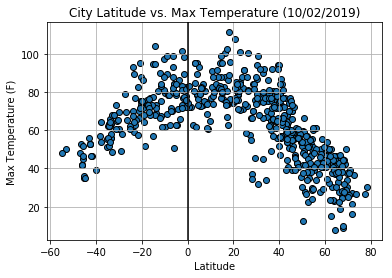

In [14]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Max Temp"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Max Temperature (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_max_temp.png")

# Show the Figure
plt.show()

#### Latitude vs. Humidity Plot

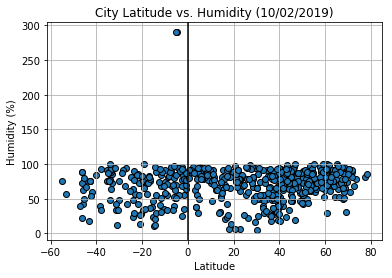

In [15]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Humidity"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Humidity (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_humidity.png")

# Show the Figure
plt.show()

#### Latitude vs. Cloudiness Plot

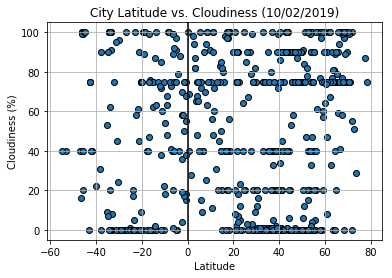

In [16]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Cloudiness"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Cloudiness (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Plot grid
plt.grid(True)

#Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_cloudiness.png")

# Show the Figure
plt.show()

#### Latitude vs. Wind Speed Plot

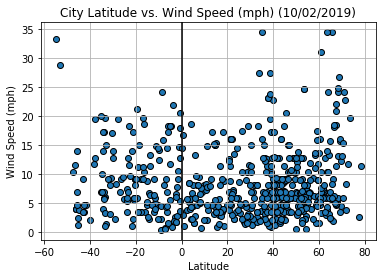

In [17]:
# Create scatter plot to compare Lattitude and Max Temp. of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lat"], data_df["Wind Speed"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Latitude vs. Wind Speed (mph) (10/02/2019)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# Plot grid
plt.grid(True)

# Plot vertical line at 0 latitude (equator)
plt.axvline(x=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_windspeed.png")

# Show the Figure
plt.show()

#### Latitude vs. Longtitude

###### Checking the locations of the cities 

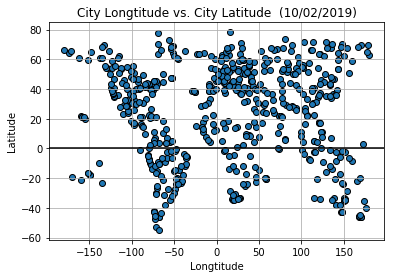

In [18]:
# Create scatter plot to see Longtitude and Lattitude of the randomly selected cities in the Data Frame
plt.scatter(data_df["Lng"], data_df["Lat"], edgecolor = 'black')

# Give the chart a title, x label, y label and grid
plt.title("City Longtitude vs. City Latitude  (10/02/2019)")
plt.xlabel("Longtitude")
plt.ylabel("Latitude")

# Plot grid
plt.grid(True)

# Plot horizontal line at 0 latitude (equator)
plt.axhline(y=0, color = 'black')

# Save the Figure
plt.savefig(r"C:\Users\AG\Documents\SMU_Assignments\Unit_06_API\plots\lat_and_lon.png")

# Show the Figure
plt.show()

***I attended the hackathon on Friday, 27 September 2019 and I received help from Bethany to complete my homework. Especially for establishing the for loop.***